In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  

!pip install konlpy
from konlpy.tag import Kkma
tokenizer = Kkma()
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import *
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dir = "/content/gdrive/My Drive/Colab Notebooks/"

In [ ]:
train = pd.read_csv(dir + "train_dataset2.csv", encoding = "utf-8-sig")
test = pd.read_csv(dir + "test_dataset2.csv", encoding = "utf-8-sig")
validation = pd.read_csv(dir + "val_dataset2.csv", encoding = "utf-8-sig")

In [ ]:
print(train.isnull().values.any())
print(test.isnull().values.any())
print(validation.isnull().values.any())

False
False
False


In [ ]:
train_data, test_data, validation_data = train, test, validation
print('훈련용 리뷰의 개수 :', len(train_data))
print('검증용 리뷰의 개수 :', len(validation_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 5875
검증용 리뷰의 개수 : 831
테스트용 리뷰의 개수 : 1688


In [ ]:
print(train_data)

      Unnamed: 0                                                  X  y
0              0  오늘밤 너는 나와 이불 속에 들어가 아무것도 하지 말고 그냥 바라보다가 웃음을 참지...  2
1              1  난 이렇게 한참을 맴돌아 이제야 내 자리를 찾았어 늘 그렇게 힘없는 별들을 헤아리고...  0
2              2  봄이면 네가 찾아올까 햇살에 눈이 녹듯이 그렇게 따뜻한 봄날이 다시 또 돌고 돌아 ...  1
3              3  매일 몰래몰래 네 발걸음을 쫓아 항상 조심조심 네가 눈치 못 채게 말하지 않아도 시...  2
4              4  겁이 나서 시작조차 안 해 봤다면  그댄 투덜대지 마라 좀  주저하면 기회는 모두 ...  2
...          ...                                                ... ..
5870        5870  무더운 여름 밤 같이 있고 싶어 시원한 한강 같이 걷고 싶어 돗자리랑 배드민턴 채 ...  2
5871        5871  요즘 나 조금 패닉 상황    솔직히 완전 홀릭인데     머릿속 어떤 녀석 그 생...  0
5872        5872  항상 밝은 표정으로 반길 거야 넌 오랫동안 곁에 있어줘        문 앞에서 널 ...  0
5873        5873  나의 하루는 가고 밤은 깊어져 차오는 어둠에 몸을 맡기고 늦은 잠에 들어 시린 꿈을...  1
5874        5874  어쩌다 어쩌다 어쩌다  널 사랑하게 됐는지  내가 왜 이꼴이 됐는지 어쩌다 어쩌다 ...  3

[5875 rows x 3 columns]


In [ ]:
train_data['tokenized'] = train_data['X'].apply(tokenizer.morphs)
test_data['tokenized'] = test_data['X'].apply(tokenizer.morphs)
validation_data['tokenized'] = validation_data['X'].apply(tokenizer.morphs)

In [ ]:
print(train_data)

      Unnamed: 0                                                  X  y  \
0              0  오늘밤 너는 나와 이불 속에 들어가 아무것도 하지 말고 그냥 바라보다가 웃음을 참지...  2   
1              1  난 이렇게 한참을 맴돌아 이제야 내 자리를 찾았어 늘 그렇게 힘없는 별들을 헤아리고...  0   
2              2  봄이면 네가 찾아올까 햇살에 눈이 녹듯이 그렇게 따뜻한 봄날이 다시 또 돌고 돌아 ...  1   
3              3  매일 몰래몰래 네 발걸음을 쫓아 항상 조심조심 네가 눈치 못 채게 말하지 않아도 시...  2   
4              4  겁이 나서 시작조차 안 해 봤다면  그댄 투덜대지 마라 좀  주저하면 기회는 모두 ...  2   
...          ...                                                ... ..   
5870        5870  무더운 여름 밤 같이 있고 싶어 시원한 한강 같이 걷고 싶어 돗자리랑 배드민턴 채 ...  2   
5871        5871  요즘 나 조금 패닉 상황    솔직히 완전 홀릭인데     머릿속 어떤 녀석 그 생...  0   
5872        5872  항상 밝은 표정으로 반길 거야 넌 오랫동안 곁에 있어줘        문 앞에서 널 ...  0   
5873        5873  나의 하루는 가고 밤은 깊어져 차오는 어둠에 몸을 맡기고 늦은 잠에 들어 시린 꿈을...  1   
5874        5874  어쩌다 어쩌다 어쩌다  널 사랑하게 됐는지  내가 왜 이꼴이 됐는지 어쩌다 어쩌다 ...  3   

                                              tokenized  
0     [오늘, 밤, 너, 는, 나오, 아, 이불, 속, 에, 들어가, 아, 무, 것, 도.

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['y'].values
X_test= test_data['tokenized'].values
y_test = test_data['y'].values
X_val= validation_data['tokenized'].values
y_val = validation_data['y'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 1
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 
total_freq = 0 
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 16269
등장 빈도가 0번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 16271


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
print(X_train[:5])

[[94, 79, 16, 4, 267, 8, 1566, 70, 12, 784, 8, 881, 21, 22, 5, 15, 35, 11, 161, 203, 231, 428, 9, 143, 15, 88, 11, 494, 3989, 3, 64, 28, 64, 6, 15, 17, 615, 585, 10, 21, 165, 3206, 8, 1252, 1408, 1428, 107, 28, 2961, 40, 14, 103, 24, 289, 6, 3, 50, 6, 366, 169, 173, 40, 3, 648, 10, 361, 29, 615, 7, 4, 1355, 3, 6145, 9, 165, 466, 215, 766, 8, 503, 425, 3, 16, 24, 296, 6, 4386, 2, 47, 711, 2216, 5, 11, 26, 2, 1261, 35, 45, 5, 15, 42, 91, 459, 7, 91, 87, 19, 1566, 9, 1344, 2, 44, 4, 352, 4, 87, 59, 77, 32, 506, 169, 15, 42, 647, 71, 187, 12, 378, 26, 2, 31, 2, 7, 14, 1303, 9, 212, 984, 1094, 2, 460, 91, 78, 8, 18, 240, 1003, 201, 1252, 1408, 1428, 107, 28, 2961, 40, 14, 103, 24, 289, 6, 3, 21, 58, 169, 173, 40, 3, 320, 41, 1912, 29, 615, 7, 4, 1355, 3, 6145, 9, 63, 466, 215, 766, 8, 5660, 63, 425, 3, 16, 24, 296, 6, 4386, 2, 47, 61, 2216, 5, 11, 26, 2, 1261, 35, 45, 5, 15, 42, 91, 7, 4, 282, 11, 378, 26, 51, 38, 2, 4, 167, 75, 16, 4, 63, 221, 176, 13, 79, 41, 9, 267, 8, 26, 2, 31, 75, 281

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 700
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 700 이하인 샘플의 비율: 98.96170212765958


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen = max_len)

In [ ]:
y_tr = np.empty((len(y_train),4))
for i in range(len(y_train)):
    if y_train[i] == 0:
      y_tr[i] = [1, 0, 0, 0]
    elif y_train[i] == 1:
      y_tr[i] = [0, 1, 0, 0]
    elif y_train[i] == 2:
      y_tr[i] = [0, 0, 1, 0]
    else:
      y_tr[i] = [0, 0, 0, 1]

In [ ]:
y_te = np.empty((len(y_test),4))
for i in range(len(y_test)):
    if y_test[i] == 0:
      y_te[i] = [1, 0, 0, 0]
    elif y_test[i] == 1:
      y_te[i] = [0, 1, 0, 0]
    elif y_test[i] == 2:
      y_te[i] = [0, 0, 1, 0]
    else:
      y_te[i] = [0, 0, 0, 1]

In [ ]:
y_va = np.empty((len(y_val),4))
for i in range(len(y_val)):
    if y_val[i] == 0:
      y_va[i] = [1, 0, 0, 0]
    elif y_val[i] == 1:
      y_va[i] = [0, 1, 0, 0]
    elif y_val[i] == 2:
      y_va[i] = [0, 0, 1, 0]
    else:
      y_va[i] = [0, 0, 0, 1]

In [ ]:
print(y_tr)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
print(y_te)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [ ]:
print(y_va)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

embedding_dim = 100
hidden_units = 50

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units)))
model.add(Dense(4, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
history = model.fit(X_train, y_tr, epochs = 20, callbacks = es, batch_size = 80, validation_data=(X_val, y_va))

Epoch 1/20
74/74 [==============================] - 90s 1s/step - loss: 1.2099 - accuracy: 0.4829 - val_loss: 1.0845 - val_accuracy: 0.5921
Epoch 2/20
74/74 [==============================] - 85s 1s/step - loss: 0.9798 - accuracy: 0.6315 - val_loss: 1.0212 - val_accuracy: 0.6197
Epoch 3/20
74/74 [==============================] - 86s 1s/step - loss: 0.7995 - accuracy: 0.7030 - val_loss: 1.0121 - val_accuracy: 0.6330
Epoch 4/20
74/74 [==============================] - 87s 1s/step - loss: 0.6526 - accuracy: 0.7588 - val_loss: 1.0437 - val_accuracy: 0.6667
Epoch 5/20
74/74 [==============================] - 84s 1s/step - loss: 0.5444 - accuracy: 0.7973 - val_loss: 1.0107 - val_accuracy: 0.6450
Epoch 6/20
74/74 [==============================] - 85s 1s/step - loss: 0.4979 - accuracy: 0.8223 - val_loss: 1.1236 - val_accuracy: 0.6245
Epoch 7/20
74/74 [==============================] - 88s 1s/step - loss: 0.4297 - accuracy: 0.8589 - val_loss: 1.2044 - val_accuracy: 0.6354
Epoch 8/20
74/74 [==

In [ ]:
 model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         1627100   
                                                                 
 bidirectional_3 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 1,687,904
Trainable params: 1,687,904
Non-trainable params: 0
_________________________________________________________________


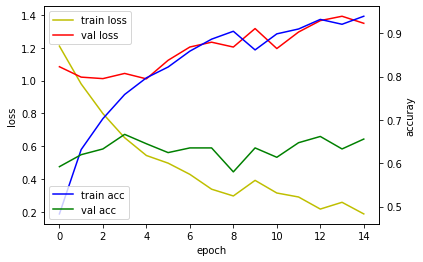

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
score = model.evaluate(X_test, y_te)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

53/53 [==============================] - 7s 138ms/step - loss: 1.3034 - accuracy: 0.6671
test_loss:  1.3033723831176758
test_acc:  0.6670616269111633


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
 print(y_pred)

[[9.9759334e-01 2.3013576e-04 1.9899029e-03 1.8664265e-04]
 [8.3637291e-01 1.1358884e-01 1.5422001e-02 3.4616210e-02]
 [3.6180699e-01 7.8482721e-03 5.9218764e-01 3.8157068e-02]
 ...
 [9.9735105e-01 2.6243442e-04 2.1314807e-03 2.5499696e-04]
 [8.7481135e-01 2.8421132e-02 9.1089040e-02 5.6784628e-03]
 [9.9496305e-01 5.7484861e-04 3.9597168e-03 5.0232973e-04]]


In [ ]:
y_class = y_pred.argmax(axis=-1)
y_class

array([0, 0, 2, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix, plot_confusion_matrix, f1_score
arr = confusion_matrix(y_test, y_class)
print(arr)

[[680  46  68  30]
 [ 62  79  24   9]
 [121  39 309  15]
 [ 95  31  22  58]]


In [ ]:
precision = precision_score(y_test, y_class, average= "macro")
print(precision)

0.5908234776113891


In [ ]:
recall = recall_score(y_test, y_class, average= "macro")
print(recall)

0.5498122142691793


In [ ]:
f1score = f1_score(y_test, y_class, average= "macro")
print(f1score)

0.5593796825857363


In [ ]:
precision = precision_score(y_test, y_class, average= "weighted")
print(precision)

0.6609101541835601


In [ ]:
recall = recall_score(y_test, y_class, average= "weighted")
print(recall)

0.6670616113744076


In [ ]:
f1score = f1_score(y_test, y_class, average= "weighted")
print(f1score)

0.6565739687403189


In [ ]:
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import matplotlib.cm

label=['sad', ' scared', 'happy', 'angry']
df_cm = DataFrame(arr, index = [i for i in label], columns = [i for i in label])
df_cm

,sad,scared,happy,angry
sad,680,46,68,30
scared,62,79,24,9
happy,121,39,309,15
angry,95,31,22,58


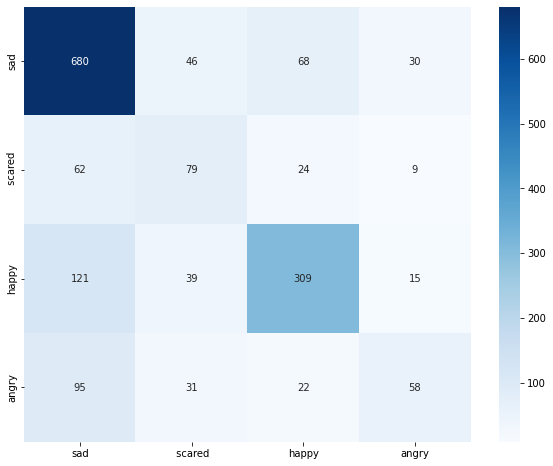

In [ ]:
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(df_cm, cmap='Blues',  xticklabels=label, yticklabels=label, annot = True, fmt='d')

**새로운 가사 데이터를 활용한 분류 결과**

In [ ]:
test_new = pd.read_csv(dir + "test_data.csv", encoding = "utf-8-sig")

In [ ]:
print(test_new)

                제목                                                 가사   감정
0        (bonus)힙합  우리 음악이 힙합인 건\n다들 아는 사실이지만\n재주 섞인 멜로디는 다림질일까\n꺼...   분노
1              팡파레  코끝을 간지럽히는 살랑 부는 바람이 눈 감으면 어디든 네 곁에 데려가 주길 어느새 ...   행복
2  안개비 (Feat. 조형근)  안개비가 내리네\n소리없이 내리네\n우산 없이 걸어도\n아무렇지 않겠지\n안개비 속...   슬픔
3              고양이  다시와 말해 줄래요  매일 울음이 멈추지않아요  매일 지나가는 사람들  너무 낯설기...  두려움


In [ ]:
import re
from konlpy.tag import Kkma
kkma = Kkma()

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = kkma.morphs(new_sentence) # 토큰화
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  y_pred = model.predict(pad_new) # 감정 분류
  result = y_pred.argmax()
  emo_result = ''
  if result == 0:
    emoresult = "슬픔"
  elif result == 1:
    emoresult = "두려움"
  elif result == 2:
    emoresult = "행복"
  else:
    emoresult = "분노"
  print("분류결과: ", emoresult)

In [ ]:
for i in range(len(test_new)):
  print(test_new['제목'][i], ":" )
  print('실제 감정: ', test_new['감정'][i])
  sentiment_predict(test_new['가사'][i])

(bonus)힙합 :
실제 감정:  분노
분류결과:  두려움
팡파레 :
실제 감정:  행복
분류결과:  행복
안개비 (Feat. 조형근) :
실제 감정:  슬픔
분류결과:  슬픔
고양이 :
실제 감정:  두려움
분류결과:  슬픔
